In [18]:
# 📦 Importação das bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly

In [19]:
# Configurações visuais
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('coolwarm')

In [20]:
import prophet
print(f"Versão do Prophet: {prophet.__version__}")

Versão do Prophet: 1.1.7


In [21]:
# 📥 Carregar o arquivo CSV com os dados fictícios de vendas
df = pd.read_csv('dados_ficticios_vendas.csv')

In [13]:
# 🔍 Analisar o formato e possíveis problemas na base (valores nulos, tipos incorretos, etc.)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2190 entries, 0 to 2189
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              2190 non-null   object 
 1   product_id        2190 non-null   object 
 2   product_category  2190 non-null   object 
 3   store_id          2190 non-null   object 
 4   sales             2190 non-null   int64  
 5   revenue           2190 non-null   float64
 6   customers         2190 non-null   int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 119.9+ KB


In [24]:
df.head()

,date,product_id,product_category,store_id,sales,revenue,customers
0,2022-01-01,P001,Eletrônicos,S03,15,1091.48,27
1,2022-01-02,P001,Eletrônicos,S04,15,1212.74,19
2,2022-01-03,P001,Eletrônicos,S01,18,116.14,6
3,2022-01-04,P001,Eletrônicos,S03,15,1545.91,16
4,2022-01-05,P001,Eletrônicos,S03,24,1454.73,40


In [25]:
# 🔍 Verificar nomes das colunas disponíveis
print("Colunas do dataset:", df.columns.tolist())

Colunas do dataset: ['date', 'product_id', 'product_category', 'store_id', 'sales', 'revenue', 'customers']


In [26]:
# Converter a coluna de data para datetime
df['date'] = pd.to_datetime(df['date'], errors='coerce')

In [27]:
# Remover registros inválidos (sem data)
df = df.dropna(subset=['date'])

In [28]:
# Ordenar por data (boa prática para séries temporais)
df = df.sort_values('date')

In [29]:
# Exibir amostra
df.head()

,date,product_id,product_category,store_id,sales,revenue,customers
0,2022-01-01,P001,Eletrônicos,S03,15,1091.48,27
730,2022-01-01,P002,Roupas,S03,13,201.80,15
1460,2022-01-01,P003,Alimentos,S01,18,951.52,40
1,2022-01-02,P001,Eletrônicos,S04,15,1212.74,19
731,2022-01-02,P002,Roupas,S01,20,366.95,9


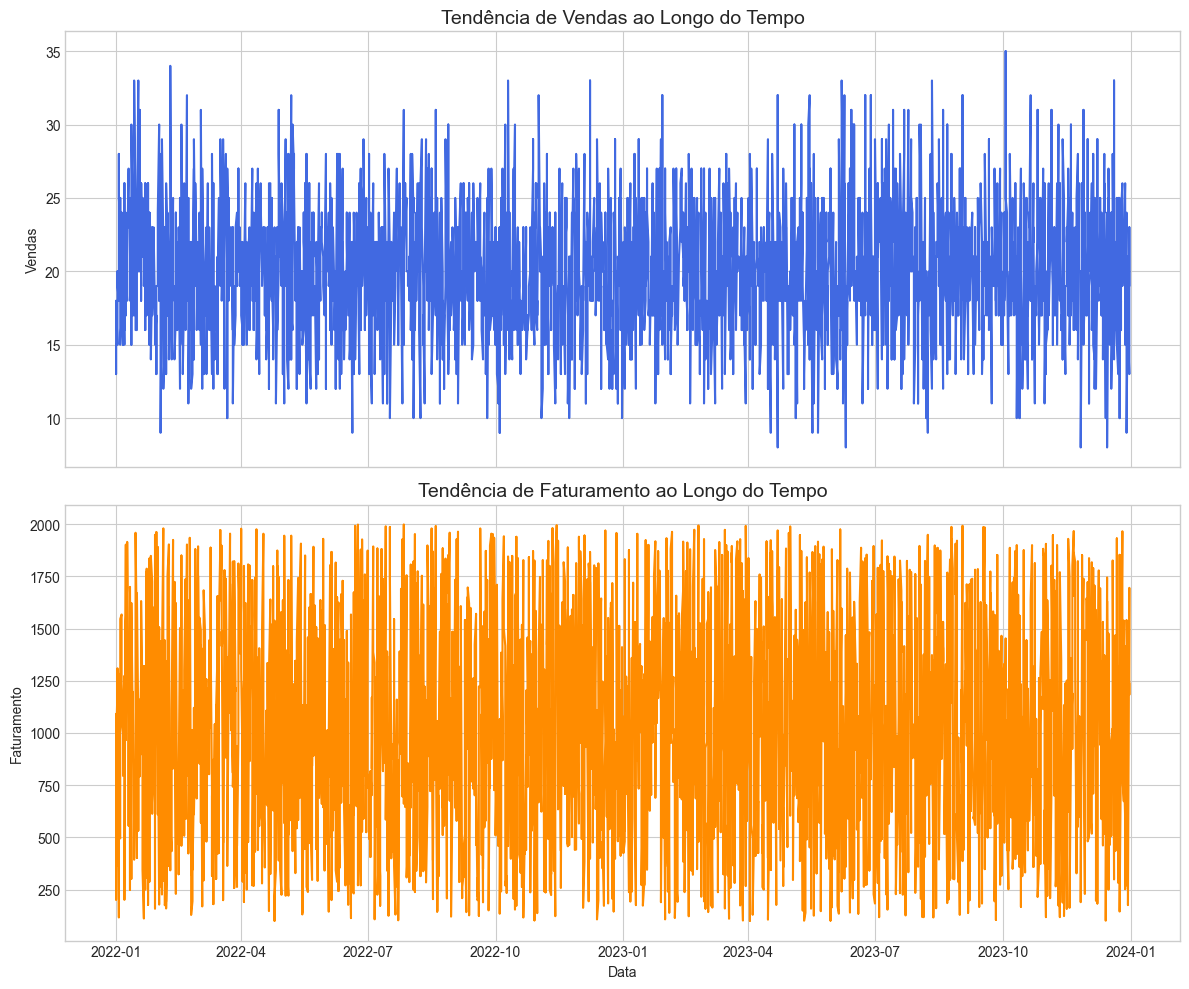

In [31]:
# 📈 Tendência geral de vendas e faturamento

fig, ax = plt.subplots(2, 1, figsize=(12,10), sharex=True)

# Gráfico 1 — Vendas
ax[0].plot(df['date'], df['sales'], color='royalblue')
ax[0].set_title('Tendência de Vendas ao Longo do Tempo', fontsize=14)
ax[0].set_ylabel('Vendas')

# Gráfico 2 — Faturamento
ax[1].plot(df['date'], df['revenue'], color='darkorange')
ax[1].set_title('Tendência de Faturamento ao Longo do Tempo', fontsize=14)
ax[1].set_xlabel('Data')
ax[1].set_ylabel('Faturamento')

plt.tight_layout()
plt.show()


In [32]:
# 🧹 Preparar dados para previsão de vendas ('sales')
df_sales = df[['date', 'sales']].rename(columns={'date': 'ds', 'sales': 'y'})

# Converter data (garantir formato correto)
df_sales['ds'] = pd.to_datetime(df_sales['ds'], errors='coerce')
df_sales = df_sales.dropna(subset=['ds', 'y'])

df_sales.head()


,ds,y
0,2022-01-01,15
730,2022-01-01,13
1460,2022-01-01,18
1,2022-01-02,15
731,2022-01-02,20


In [33]:
# ⚙️ Criar e treinar o modelo Prophet para prever vendas
modelo_sales = Prophet(
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=False,
    seasonality_mode='additive'
)

modelo_sales.fit(df_sales)

# Criar dataframe futuro (90 dias)
futuro_sales = modelo_sales.make_future_dataframe(periods=90)
previsao_sales = modelo_sales.predict(futuro_sales)

# Exibir últimas previsões
previsao_sales[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


12:42:32 - cmdstanpy - INFO - Chain [1] start processing
12:42:33 - cmdstanpy - INFO - Chain [1] done processing


,ds,yhat,yhat_lower,yhat_upper
815,2024-03-26,20.717198,15.198015,25.845553
816,2024-03-27,20.707888,14.906332,26.105785
817,2024-03-28,20.419744,14.435509,26.269406
818,2024-03-29,21.144337,15.544024,26.974389
819,2024-03-30,20.802110,15.071127,26.334959


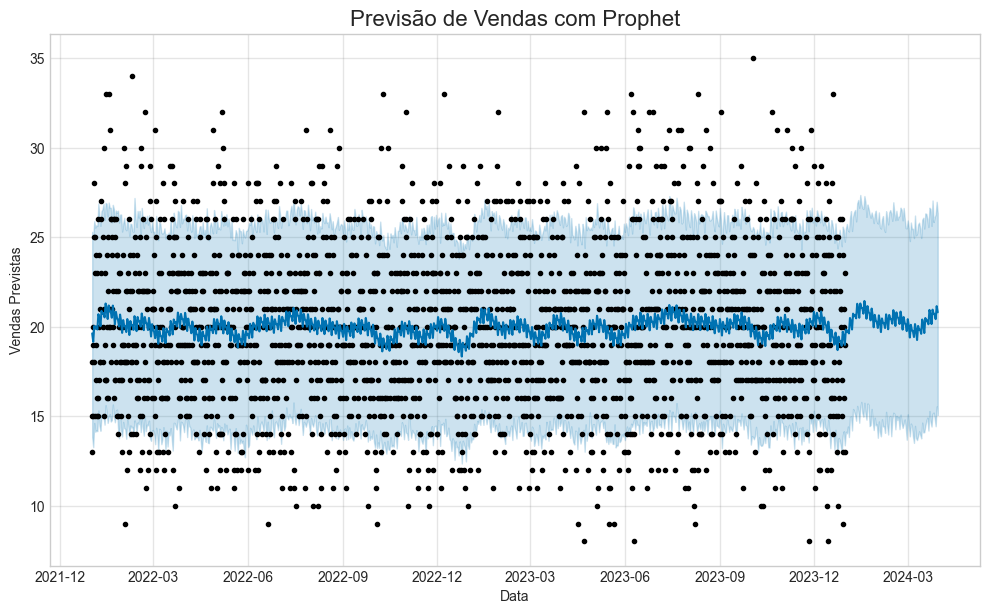

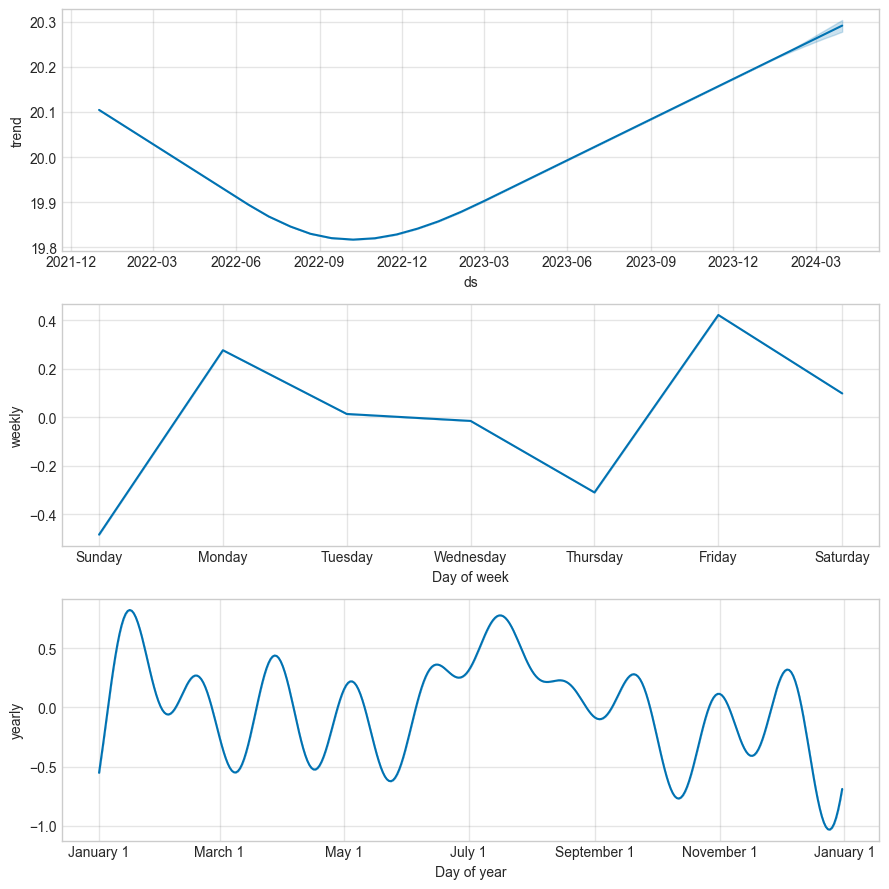

In [34]:
# 📊 Visualizar previsão de vendas
fig1 = modelo_sales.plot(previsao_sales, xlabel='Data', ylabel='Vendas Previstas')
plt.title('Previsão de Vendas com Prophet', fontsize=16)
plt.show()

# Componentes da previsão
fig2 = modelo_sales.plot_components(previsao_sales)
plt.show()


In [35]:
# 🧹 Preparar dados para previsão de faturamento ('revenue')
df_revenue = df[['date', 'revenue']].rename(columns={'date': 'ds', 'revenue': 'y'})

df_revenue['ds'] = pd.to_datetime(df_revenue['ds'], errors='coerce')
df_revenue = df_revenue.dropna(subset=['ds', 'y'])

df_revenue.head()


,ds,y
0,2022-01-01,1091.48
730,2022-01-01,201.80
1460,2022-01-01,951.52
1,2022-01-02,1212.74
731,2022-01-02,366.95


In [36]:
# ⚙️ Criar e treinar o modelo Prophet para prever faturamento
modelo_revenue = Prophet(
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=False,
    seasonality_mode='additive'
)

modelo_revenue.fit(df_revenue)

# Criar dataframe futuro (90 dias)
futuro_revenue = modelo_revenue.make_future_dataframe(periods=90)
previsao_revenue = modelo_revenue.predict(futuro_revenue)

previsao_revenue[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


12:43:21 - cmdstanpy - INFO - Chain [1] start processing
12:43:21 - cmdstanpy - INFO - Chain [1] done processing


,ds,yhat,yhat_lower,yhat_upper
815,2024-03-26,1153.504959,465.731194,1864.696854
816,2024-03-27,1115.567381,475.802512,1812.156940
817,2024-03-28,1094.954604,392.060398,1746.279930
818,2024-03-29,1106.805885,441.278618,1862.776488
819,2024-03-30,1026.357674,413.513078,1687.729604


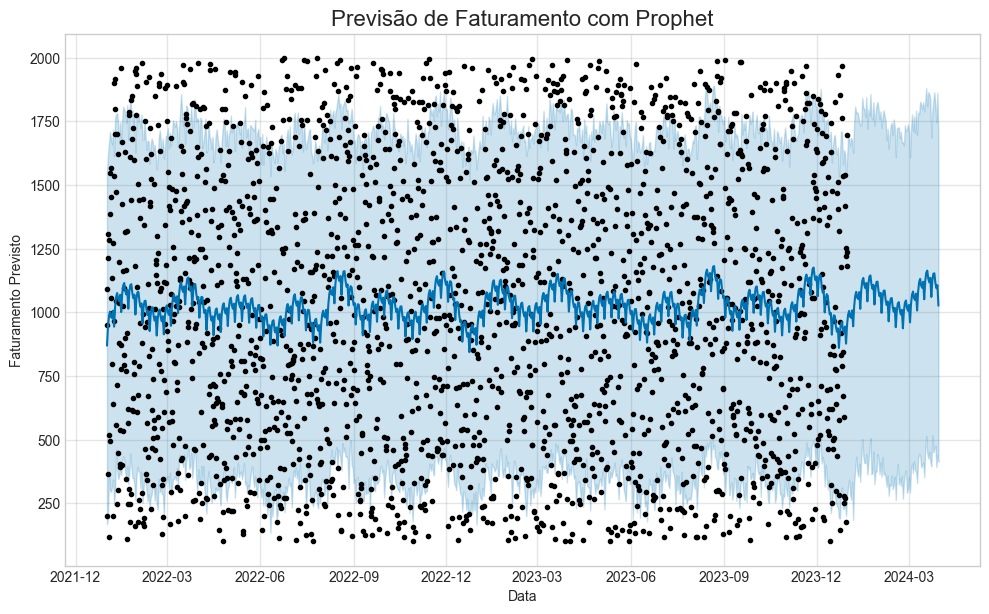

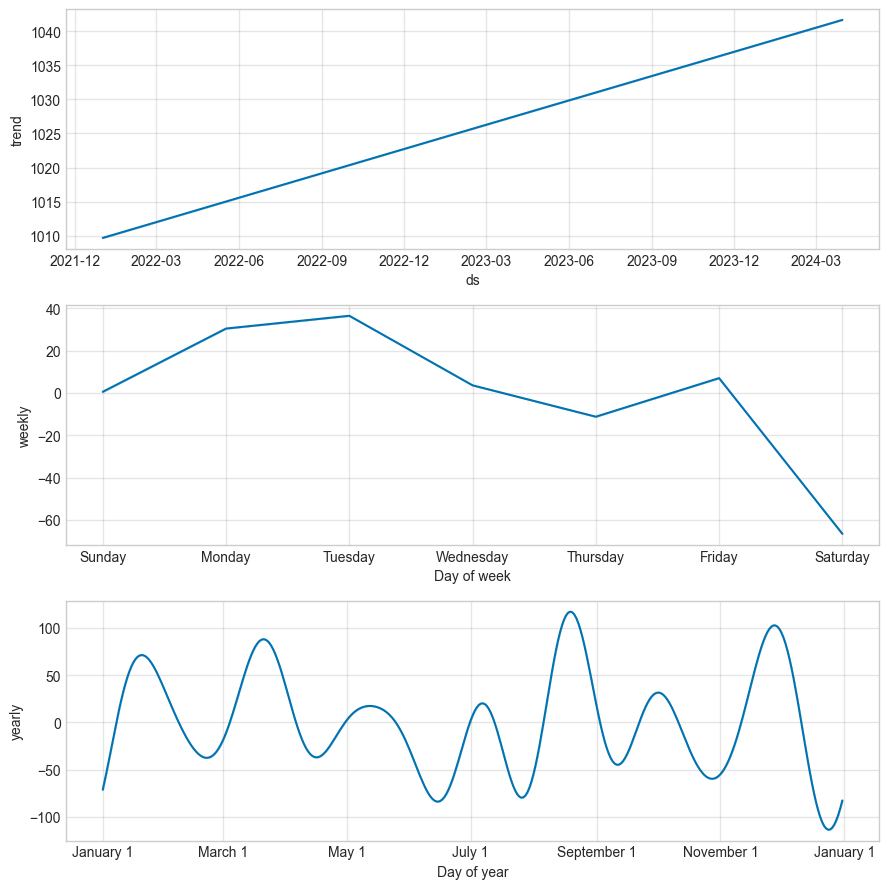

In [37]:
# 📊 Visualizar previsão de faturamento
fig3 = modelo_revenue.plot(previsao_revenue, xlabel='Data', ylabel='Faturamento Previsto')
plt.title('Previsão de Faturamento com Prophet', fontsize=16)
plt.show()

# Componentes da previsão
fig4 = modelo_revenue.plot_components(previsao_revenue)
plt.show()


In [38]:
# 🧮 Calcular erro médio absoluto (MAE) para ambos os modelos

# Vendas
comparacao_sales = previsao_sales[['ds', 'yhat']].merge(df_sales, on='ds', how='left')
comparacao_sales = comparacao_sales.dropna()
mae_sales = np.mean(np.abs(comparacao_sales['y'] - comparacao_sales['yhat']))

# Faturamento
comparacao_revenue = previsao_revenue[['ds', 'yhat']].merge(df_revenue, on='ds', how='left')
comparacao_revenue = comparacao_revenue.dropna()
mae_revenue = np.mean(np.abs(comparacao_revenue['y'] - comparacao_revenue['yhat']))

print(f"Erro Médio Absoluto (MAE) — Vendas: {mae_sales:.2f}")
print(f"Erro Médio Absoluto (MAE) — Faturamento: {mae_revenue:.2f}")


Erro Médio Absoluto (MAE) — Vendas: 3.59
Erro Médio Absoluto (MAE) — Faturamento: 461.54


In [39]:
# 📋 Conclusões:
# - O Prophet conseguiu capturar tendências e padrões de sazonalidade tanto nas vendas quanto no faturamento.
# - O modelo de faturamento tende a ter valores maiores e variação mais estável.
# - O MAE mostra o quão próxima a previsão está dos valores reais — quanto menor, melhor.
# - Este projeto demonstra habilidades em:
#   * Manipulação e limpeza de dados
#   * Análise exploratória de séries temporais
#   * Modelagem preditiva com Prophet
#   * Comunicação de resultados e storytelling com dados

print("✅ Projeto finalizado com sucesso!")


✅ Projeto finalizado com sucesso!
